# **Stock Investment Recommendation Model**

## **Business Overview for Stock Investment Recommendation Model**

---

**Project Title:** Stock Investment Recommendation System

**Overview:**  
This project aims to create a machine learning model that delivers personalized stock investment recommendations based on individual risk appetites. By analyzing historical data from Yahoo Finance, the system will suggest suitable investments across various sectors, empowering investors with data-driven insights to enhance their decision-making and improve investment outcomes.

## Business Understanding
The business questions we will be trying to answer are:
1. How can we categorize stocks into different risk levels that align with investor preferences?
2. How can we personalize stock recommendations based on each customer's risk appetite?
3. What data-driven insights can we provide to customers to increase their confidence in the recommended stocks?
4. What metrics should be used to evaluate the success of the recommendations (e.g., customer satisfaction, portfolio performance, customer retention)?

## Data Understanding
### Overview
The dataset obtained from Yahoo Finance contains historical stock price data for various companies. This data typically includes daily trading information, which is crucial for analyzing stock performance, volatility, and market trends. The dataset spans multiple years, allowing for comprehensive analysis of stock behavior over time.

#### Structure of the Dataset
The dataset contains the following columns:

1. **Open**: The price at which the stock opened for trading on a given day.
2. **High**: The highest price reached during the trading session.
3. **Low**: The lowest price recorded during the trading session.
4. **Close**: The price at which the stock closed at the end of the trading day.
5. **Adj Close**: The adjusted closing price that accounts for any corporate actions (like stock splits and dividends) to reflect the stock's true value.
6. **Volume**: The total number of shares traded during the day, providing insights into market activity and liquidity.
7. **Beta**: A measure of a stock's volatility in relation to the market, indicating how much the stock's price is expected to move compared to a broader index (like the S&P 500).



# Data Cleaning

This section reads in a CSV file containing stock data and displays the first 20 rows and summary statistics. This provides an initial overview of the data's structure and basic statistics for each column.

In [33]:
# importing  neccesarry libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Data Loading

This section of the code is responsible for loading the stock data from a CSV file and providing a quick overview of the dataset.


In [34]:
# Load the dataset
try:
    data = pd.read_csv("final_stocks_data.csv")
    print("Data loaded successfully.")
    
    # Display the first 20 rows of the dataset
    print(data.head(5))
    
    # Display basic information about the dataset
    print(data.info())
    print(data.describe())
except FileNotFoundError:
    print("Error: The file 'final_stocks_data.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.
                        Date Symbol        Open        High         Low  \
0  2022-01-03 00:00:00+00:00   AAPL  177.830002  182.880005  177.710007   
1  2022-01-03 00:00:00+00:00    XOM   61.240002   63.599998   61.209999   
2  2022-01-03 00:00:00+00:00     VZ   52.070000   52.560001   51.980000   
3  2022-01-03 00:00:00+00:00      V  217.520004  222.059998  217.009995   
4  2022-01-03 00:00:00+00:00   TSLA  382.583344  400.356659  378.679993   

        Close   Adj Close       Volume      Beta  
0  182.009995  179.273621  104487900.0  1.232782  
1   63.540001   57.618000   24282400.0  0.471497  
2   52.439999   43.423004   18240100.0  0.337004  
3  221.429993  216.793564    7694500.0  0.867907  
4  399.926666  399.926666  103931400.0  1.909699  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21450 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21450 non-nul

Lets define a function to remove outliers based on Z-scores. This technique identifies outliers by calculating the Z-score for each value in specified columns. If a Z-score is above the threshold(3), the value is considered an outlier and removed.

In [35]:
# removing for outliers
def remove_outliers_zscore(data, numerical_cols, threshold=3):
    """
    Removes outliers from the given DataFrame using the Z-score method.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing the data.
    numerical_cols : list
        List of numerical columns to check for outliers.
    threshold : float, optional (default=3)
        The Z-score threshold to use for outlier detection.

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with outliers removed.
    """
    # Calculate Z-scores for the numerical columns
    z_scores = data[numerical_cols].apply(zscore)

    # Create a mask for non-outliers (Z-scores within the threshold)
    mask = (np.abs(z_scores) < threshold).all(axis=1)

    # Return the filtered DataFrame without outliers
    return data[mask]

# calling the function
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_cleaned = remove_outliers_zscore(data, numerical_cols)

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Optional: Save the cleaned data to a CSV




Original data shape: (21450, 9)
Cleaned data shape: (20371, 9)


In [36]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20371 non-null  object 
 1   Symbol     20371 non-null  object 
 2   Open       20371 non-null  float64
 3   High       20371 non-null  float64
 4   Low        20371 non-null  float64
 5   Close      20371 non-null  float64
 6   Adj Close  20371 non-null  float64
 7   Volume     20371 non-null  float64
 8   Beta       20371 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


In [37]:
data = data_cleaned

next we converted the "Date" column to datetime format for consistency, renames columns by removing whitespace and standardizing to lowercase with underscores, and calculates the number of duplicate rows in the dataset.


In [38]:
# changing columns to correct data types
data["Date"] = pd.to_datetime(data["Date"])

In [39]:
# removing space and switching to lowercase
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [40]:
# checking for duplicates 
duplicates = data.duplicated().sum()

In [41]:
# transfer to another csv file for Tableau for further Visualization
data.to_csv("data_cleaned.csv", index=False)

## EDA

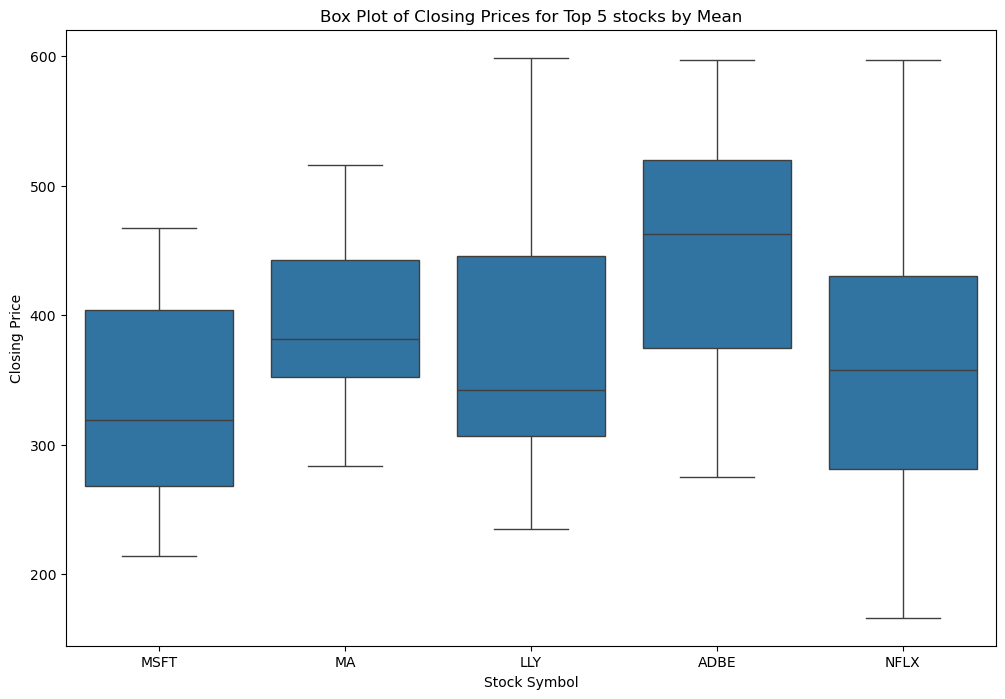

In [42]:
top_symbols = data.groupby('symbol')['close'].mean().nlargest(5).index
data['symbol'].value_counts().head(5).index

# Filter the data to only include the top 5 symbols
top_symbols_data = data[data['symbol'].isin(top_symbols)]

# Create box plots for 'Close' prices of the top 5 symbols to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x='symbol', y='close', data=top_symbols_data)
plt.title("Box Plot of Closing Prices for Top 5 stocks by Mean")
plt.xlabel("Stock Symbol")
plt.ylabel("Closing Price")
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20371 entries, 0 to 21449
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       20371 non-null  datetime64[ns, UTC]
 1   symbol     20371 non-null  object             
 2   open       20371 non-null  float64            
 3   high       20371 non-null  float64            
 4   low        20371 non-null  float64            
 5   close      20371 non-null  float64            
 6   adj_close  20371 non-null  float64            
 7   volume     20371 non-null  float64            
 8   beta       20371 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.6+ MB


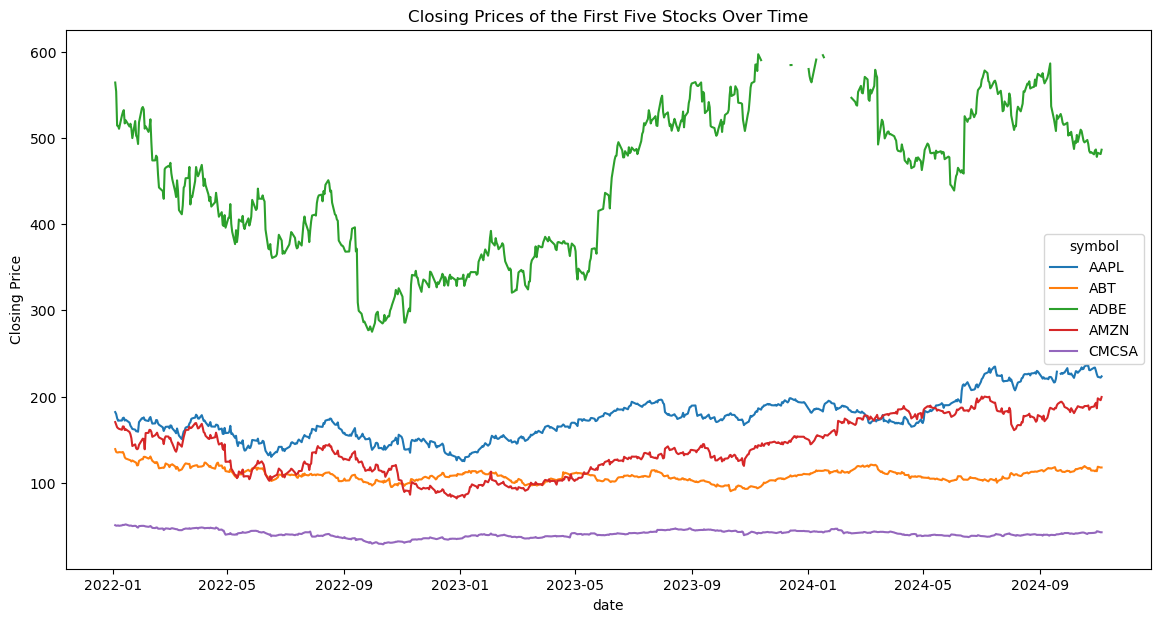

In [44]:
#for the first ten stocks
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[:5]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of the First Five Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()



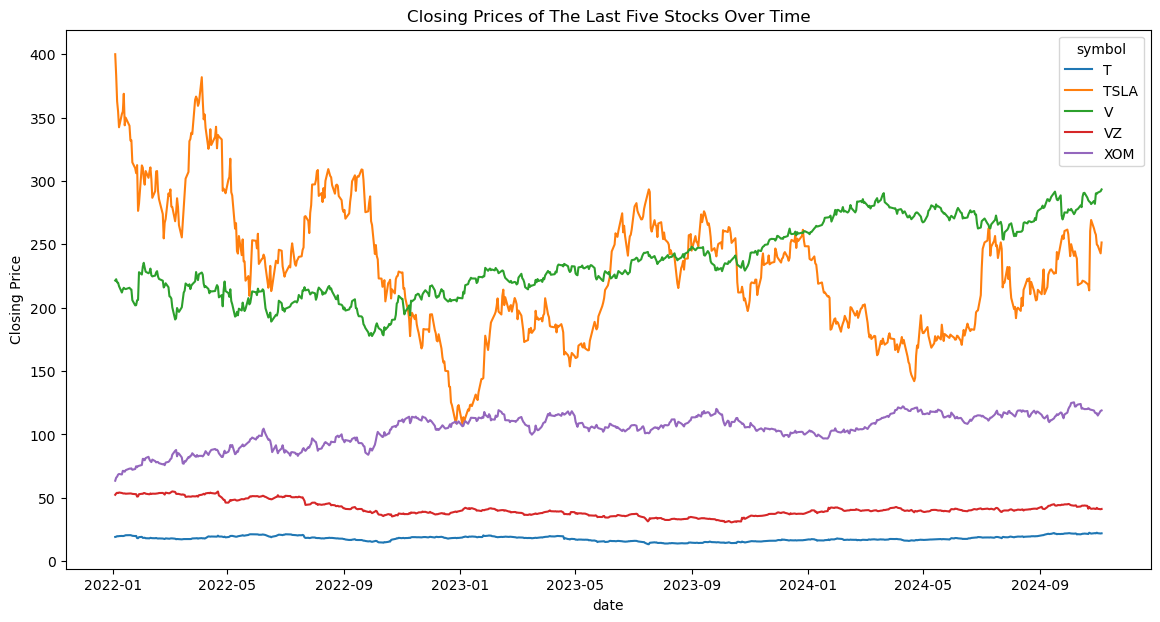

In [45]:
# for the last 5
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[25:30]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of The Last Five Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


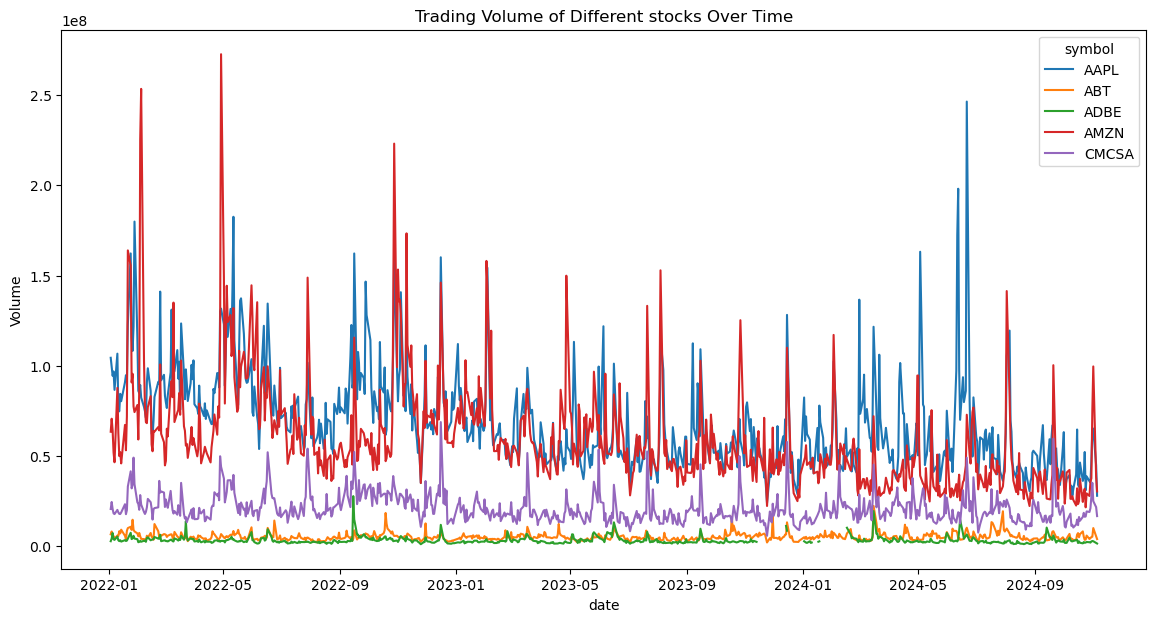

In [46]:
#stock volume over time
volumes = data.pivot(index='date', columns='symbol', values='volume')

# Plot
plt.figure(figsize=(14, 7))
for symbol in volumes.columns[:5]:
    plt.plot(volumes.index, volumes[symbol], label=symbol)
plt.title('Trading Volume of Different stocks Over Time')
plt.xlabel('date')
plt.ylabel('Volume')
plt.legend(title='symbol')
plt.show()


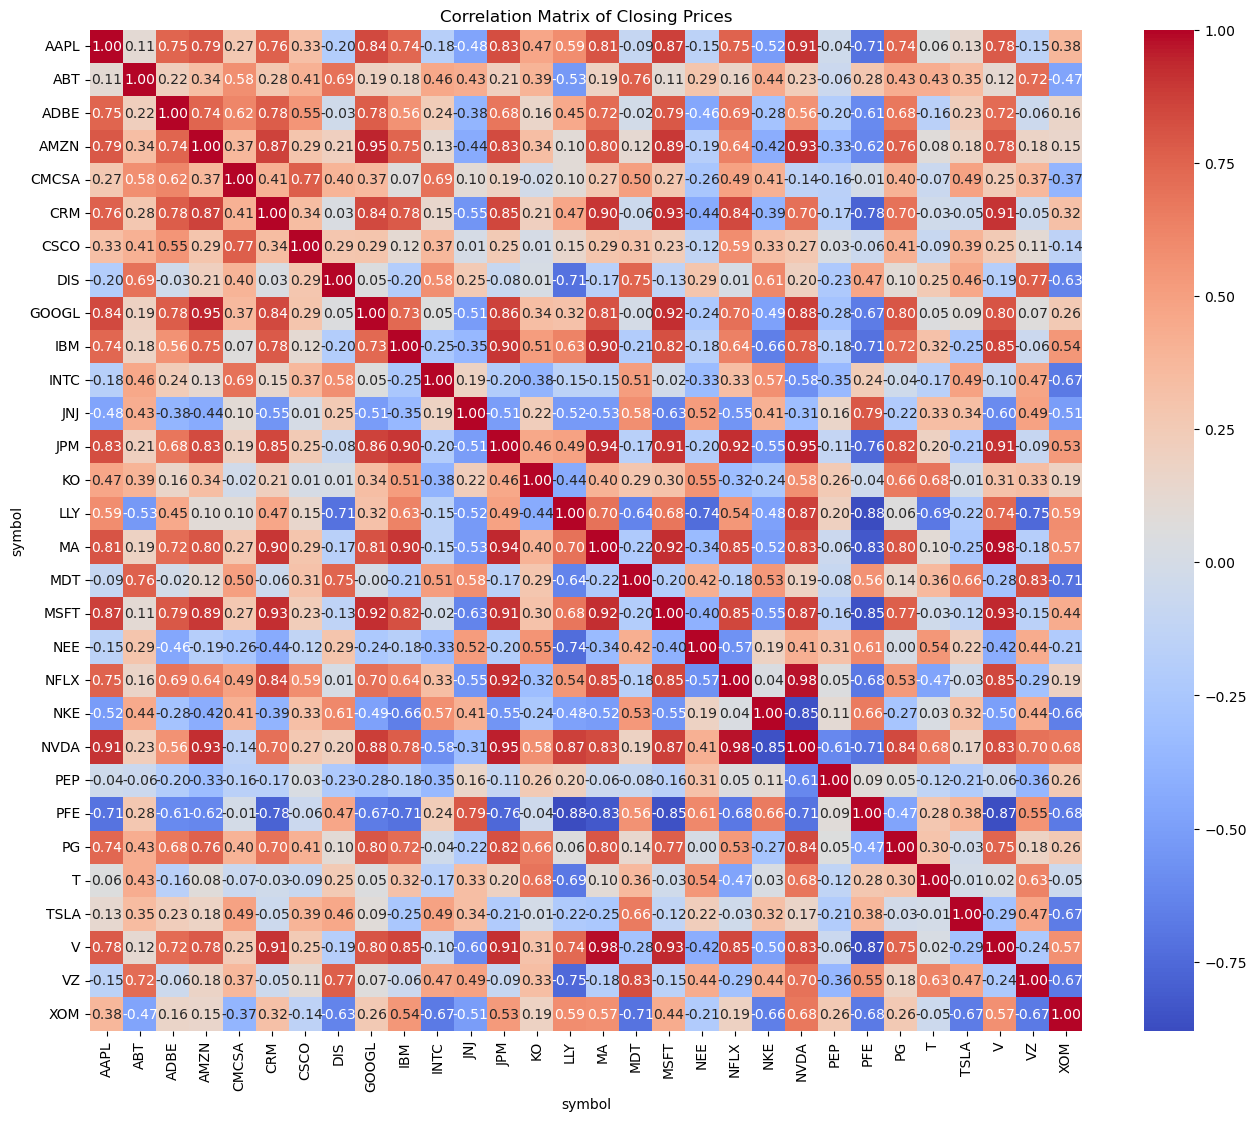

In [47]:
# Calculate the correlation matrix
corr_matrix = closing_prices.corr()

# Plot heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Closing Prices')
plt.show()


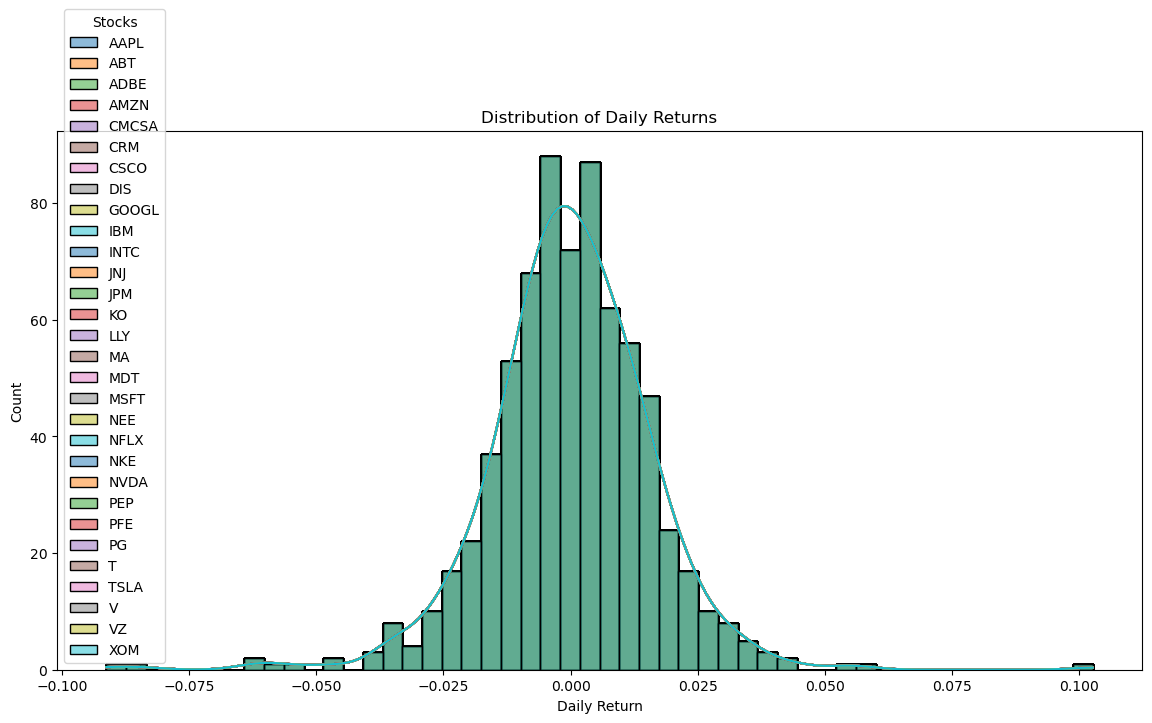

In [48]:
# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Plot distribution of daily returns for each stock
plt.figure(figsize=(14, 7))
for stock in daily_returns.columns:
    sns.histplot(daily_returns[symbol], kde=True, label=stock, bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.legend(title='Stocks')
plt.show()


## FEATURE ENGINEERING


### Explanation of Key Features

1. **Daily Returns**: Captures the daily percentage change in closing price, a metric of stock volatility.
2. **Moving Averages (SMA and EMA)**: Smooths price data to highlight trends.
3. **Volatility**: Measures price fluctuations over short periods (7 and 14 days).
4. **Relative Strength Index (RSI)**: Indicates overbought or oversold conditions based on price gains and losses.
5. **Bollinger Bands**: Provides a volatility range using the 20-day SMA and 2 standard deviations.
6. **Time-Based Features**: Adds temporal information (day of the week, month, and quarter) for seasonality.
7. **Lag Features**: Captures previous days' prices to model short-term momentum.
8. **MACD**: Measures the difference between 12-day and 26-day EMAs to indicate momentum shifts.
9. **Backfilling Missing Values**: Ensures the dataset is complete for modeling.

This feature engineering process enriches the dataset with essential indicators, enabling effective clustering based on risk.

In [49]:

#  Ensure Date is in datetime format
def preprocess_data(data):
    data['date'] = pd.to_datetime(data['date'])
    data.sort_values(by=['symbol', 'date'], inplace=True)
    return data

# Calculate Daily Returns
def calculate_daily_returns(data):
    data['daily_return'] = data.groupby('symbol')['close'].transform(lambda x: x.pct_change())
    return data

# Calculate Simple Moving Averages (SMA)
def calculate_sma(data, windows=[7, 14, 20]):
    for window in windows:
        data[f'SMA_{window}'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=window).mean())
    return data

# Calculate Exponential Moving Averages (EMA)
def calculate_ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

def add_ema(data, spans=[7, 14, 12, 26]):
    for span in spans:
        data[f'EMA_{span}'] = data.groupby('symbol')['close'].transform(lambda x: calculate_ema(x, span))
    return data

# Calculate Volatility
def calculate_volatility(data, windows=[7, 14]):
    for window in windows:
        data[f'Volatility_{window}d'] = data.groupby('symbol')['daily_return'].transform(lambda x: x.rolling(window=window).std())
    return data

# Calculate Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def add_rsi(data, window=14):
    data[f'RSI_{window}'] = data.groupby('symbol')['close'].transform(lambda x: calculate_rsi(x, window))
    return data

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    data['SMA_20'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=window).mean())
    rolling_std = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=window).std())
    data['BB_Upper'] = data['SMA_20'] + (2 * rolling_std)
    data['BB_Lower'] = data['SMA_20'] - (2 * rolling_std)
    return data

# Add Time-Based Features
def add_time_features(data):
    data['Day_of_Week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
    data['Month'] = data['date'].dt.month
    data['Quarter'] = data['date'].dt.quarter
    return data

# Create Lag Features for Open, High, Low, and Close prices
def create_lag_features(data, lags=[1, 2, 3]):
    for lag in lags:
        for col in ['open', 'high', 'low', 'close']:
            data[f'{col.capitalize()}_Lag_{lag}'] = data.groupby('symbol')[col].transform(lambda x: x.shift(lag))
    return data

# Calculate MACD
def calculate_macd(data):
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    return data

# Fill NaN values
def fill_missing_values(data):
    data.fillna(method='bfill', inplace=True)
    return data

# Main function to run all feature engineering steps
def feature_engineering_pipeline(data):
    data = preprocess_data(data)
    data = calculate_daily_returns(data)
    data = calculate_sma(data)
    data = add_ema(data)
    data = calculate_volatility(data)
    data = add_rsi(data)
    data = calculate_bollinger_bands(data)
    data = add_time_features(data)
    data = create_lag_features(data)
    data = calculate_macd(data)
    data = fill_missing_values(data)
    return data

# Load your data
# data = pd.read_csv('your_input_data.csv')

# Run the pipeline
data = feature_engineering_pipeline(data)

# Save to CSV
data.to_csv('engineered_stocks_data.csv', index=False)


In [50]:
data.head()

,date,symbol,open,high,low,close,adj_close,volume,beta,daily_return,...,Close_Lag_1,Open_Lag_2,High_Lag_2,Low_Lag_2,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,MACD
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273621,104487900.0,1.232782,-0.012692,...,182.009995,177.830002,182.880005,177.710007,182.009995,177.830002,182.880005,177.710007,182.009995,0.000000
53,2022-01-04 00:00:00+00:00,AAPL,182.630005,182.940002,179.119995,179.699997,176.998337,99310400.0,1.232782,-0.012692,...,182.009995,177.830002,182.880005,177.710007,182.009995,177.830002,182.880005,177.710007,182.009995,-0.184273
82,2022-01-05 00:00:00+00:00,AAPL,179.610001,180.169998,174.639999,174.919998,172.290192,94537600.0,1.232782,-0.026600,...,179.699997,177.830002,182.880005,177.710007,182.009995,177.830002,182.880005,177.710007,182.009995,-0.707857
106,2022-01-06 00:00:00+00:00,AAPL,172.699997,175.300003,171.639999,172.000000,169.414124,96904000.0,1.232782,-0.016693,...,174.919998,182.630005,182.940002,179.119995,179.699997,177.830002,182.880005,177.710007,182.009995,-1.342941
138,2022-01-07 00:00:00+00:00,AAPL,172.889999,174.139999,171.029999,172.169998,169.581528,86709100.0,1.232782,0.000988,...,172.000000,179.610001,180.169998,174.639999,174.919998,182.630005,182.940002,179.119995,179.699997,-1.811647


In [51]:

# Display the first few rows of the engineered DataFrame
data.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'beta', 'daily_return', 'SMA_7', 'SMA_14', 'SMA_20', 'EMA_7', 'EMA_14',
       'EMA_12', 'EMA_26', 'Volatility_7d', 'Volatility_14d', 'RSI_14',
       'BB_Upper', 'BB_Lower', 'Day_of_Week', 'Month', 'Quarter', 'Open_Lag_1',
       'High_Lag_1', 'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2',
       'Low_Lag_2', 'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3',
       'Close_Lag_3', 'MACD'],
      dtype='object')

### feature selection using correlation


In [52]:
correlation_matrix = data.drop(columns=['symbol']).corr()

correlation_matrix

,date,open,high,low,close,adj_close,volume,beta,daily_return,SMA_7,...,Close_Lag_1,Open_Lag_2,High_Lag_2,Low_Lag_2,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,MACD
date,1.000000,0.053200,0.050498,0.056291,0.053491,0.066488,0.000110,0.008132,0.032374,0.050718,...,0.052384,0.051064,0.048346,0.054159,0.051307,0.050000,0.047262,0.053098,0.050219,0.201049
open,0.053200,1.000000,0.999837,0.999821,0.999645,0.999352,-0.142111,0.385011,0.004024,0.999111,...,0.999738,0.998783,0.998952,0.998974,0.999117,0.998182,0.998358,0.998361,0.998502,0.169336
high,0.050498,0.999837,1.000000,0.999757,0.999823,0.999568,-0.138550,0.388515,0.011419,0.999042,...,0.999589,0.998661,0.998893,0.998787,0.998987,0.998083,0.998302,0.998198,0.998385,0.167326
low,0.056291,0.999821,0.999757,1.000000,0.999837,0.999502,-0.145999,0.381310,0.012238,0.998925,...,0.999549,0.998539,0.998657,0.998801,0.998890,0.997925,0.998036,0.998174,0.998247,0.173252
close,0.053491,0.999645,0.999823,0.999837,1.000000,0.999701,-0.142217,0.384806,0.019665,0.998862,...,0.999390,0.998431,0.998610,0.998619,0.998758,0.997849,0.998004,0.998026,0.998136,0.170791
adj_close,0.066488,0.999352,0.999568,0.999502,0.999701,1.000000,-0.135025,0.397135,0.019798,0.998570,...,0.999094,0.998144,0.998361,0.998292,0.998466,0.997565,0.997757,0.997701,0.997846,0.170519
volume,0.000110,-0.142111,-0.138550,-0.145999,-0.142217,-0.135025,1.000000,0.474434,0.037717,-0.142538,...,-0.142163,-0.142087,-0.139172,-0.145317,-0.142223,-0.142159,-0.139371,-0.145337,-0.142321,-0.002558
beta,0.008132,0.385011,0.388515,0.381310,0.384806,0.397135,0.474434,1.000000,0.019388,0.385651,...,0.385023,0.385426,0.388940,0.381735,0.385245,0.385635,0.389153,0.381948,0.385461,-0.019675
daily_return,0.032374,0.004024,0.011419,0.012238,0.019665,0.019798,0.037717,0.019388,1.000000,-0.003492,...,-0.007482,-0.007762,-0.007551,-0.007846,-0.007947,-0.007060,-0.007500,-0.007420,-0.007884,0.055110
SMA_7,0.050718,0.999111,0.999042,0.998925,0.998862,0.998570,-0.142538,0.385651,-0.003492,1.000000,...,0.999288,0.999587,0.999592,0.999548,0.999539,0.999575,0.999616,0.999601,0.999618,0.156367


In [53]:
data.isna().sum()

date                0
symbol              0
open                0
high                0
low                 0
close               0
adj_close           0
volume              0
beta                0
daily_return        0
SMA_7               0
SMA_14              0
SMA_20              0
EMA_7               0
EMA_14              0
EMA_12              0
EMA_26              0
Volatility_7d       0
Volatility_14d      0
RSI_14            691
BB_Upper            0
BB_Lower            0
Day_of_Week         0
Month               0
Quarter             0
Open_Lag_1          0
High_Lag_1          0
Low_Lag_1           0
Close_Lag_1         0
Open_Lag_2          0
High_Lag_2          0
Low_Lag_2           0
Close_Lag_2         0
Open_Lag_3          0
High_Lag_3          0
Low_Lag_3           0
Close_Lag_3         0
MACD                0
dtype: int64

In [54]:
data.dropna(subset=['RSI_14'], inplace=True)

### Feature Selection Using Correlation Analysis

This code performs feature selection by calculating the correlation of various features with specific target variables. The objective is to identify features that are highly correlated with the target features (`adj_close`, `BB_Upper`, and `BB_Lower`) to retain only the most relevant features for further analysis and modeling.

#### Code Walkthrough

1. **Select Numeric Features**:  
   First, we select only the numeric columns from the dataset, as these are suitable for correlation analysis. Non-numeric columns, like dates or categorical variables, are excluded.


2. **Define Targets and Set Correlation Threshold**:  
   We define the target features (`adj_close`, `BB_Upper`, `BB_Lower`) and set a correlation threshold (`corr_threshold`) of 0.5. Only features with an absolute correlation above this threshold will be selected.


3. **Calculate Absolute Correlations**:  
   For each target feature, we calculate the absolute correlation of all numeric features with that target. This provides a dictionary of correlations for each target.


4. **Combine Correlations into a DataFrame**:  
   The individual correlation results for each target are combined into a single DataFrame for easy comparison across targets.

  

5. **Select Highly Correlated Features**:  
   We identify features that meet the correlation threshold for all target features by filtering the `correlation_df`. Only features with a correlation above the threshold (0.5) across all targets are selected.

   
6. **Filter the Original DataFrame**:  
   Finally, we filter the original data to retain only the selected high-correlation features, creating a new DataFrame (`filtered_df`) for further analysis.

7. **Output the Selected Features**:  
   The selected features are printed to verify the features chosen based on the correlation criteria.




In [55]:
# Step 1: Select only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=[float, int])

# Step 2: Define target features for correlation check and set threshold
targets = ['adj_close', 'BB_Upper', 'BB_Lower']
corr_threshold = 0.7

# Step 3: Calculate absolute correlations for each target feature with all other numeric features
correlations = {target: data_numeric.corr()[target].abs() for target in targets}

# Step 4: Combine individual target correlations into a single DataFrame
correlation_df = pd.DataFrame(correlations)

# Step 5: Identify features that have a high correlation (> threshold) with all target features
selected_features = correlation_df[(correlation_df > corr_threshold).all(axis=1)].index

# Step 6: Filter the original data to include only these selected high-correlation features
filtered_df = data[selected_features]

# Output the selected features for verification
print("Selected features with high correlation to targets:", selected_features.tolist())


Selected features with high correlation to targets: ['open', 'high', 'low', 'close', 'adj_close', 'SMA_7', 'SMA_14', 'SMA_20', 'EMA_7', 'EMA_14', 'EMA_12', 'EMA_26', 'BB_Upper', 'BB_Lower', 'Open_Lag_1', 'High_Lag_1', 'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2', 'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3']



### Scaling and PCA Transformation

This code performs two key steps—scaling and Principal Component Analysis (PCA)—to prepare the data for dimensionality reduction. By reducing the dataset to its most significant components, PCA allows us to capture the most important information in a lower-dimensional space, which can help simplify analysis and improve model performance.

#### Code Walkthrough

1. **Scaling the Data**:  
   We use `StandardScaler` to standardize the features, ensuring each feature has a mean of 0 and a standard deviation of 1. This step is crucial for PCA because it removes scale disparities among features, allowing PCA to correctly capture variance across them.

2. **Applying PCA**:  
   We apply PCA to reduce the dataset to a specified number of principal components (`n_components`). Here, we use 3 components, though this can be adjusted. PCA helps to capture the maximum variance in fewer components, making the data more manageable.

3. **Creating the PCA DataFrame**:  
   The transformed data is then converted into a DataFrame (`pca_df`), with columns labeled as `PC1`, `PC2`, etc., based on the number of components. This labeled DataFrame makes it easy to interpret and visualize the principal components.

4. **Outputting the Results**:  
   Finally, we print the PCA-transformed DataFrame to verify the results.



In [ ]:
# Step 1: Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)  # Fit and transform the selected features

# Step 2: Apply PCA
n_components = 3  # Define the number of principal components to retain
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)  # Fit PCA model and transform scaled data

# Step 3: Convert PCA Results to DataFrame
pca_df = pd.DataFrame(
    data=pca_data,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Output the resulting DataFrame with principal components
print("PCA-transformed Data:")
print(pca_df)


PCA-transformed Data:
            PC1       PC2       PC3
0      0.850246 -0.094033  0.057763
1      0.850717 -0.097687  0.056536
2      0.818438 -0.070280  0.053164
3      0.758683 -0.020077  0.047811
4      0.703182  0.012705  0.043185
...         ...       ...       ...
19675 -3.578577 -0.053657  0.037715
19676 -3.530860 -0.073116  0.042235
19677 -3.486196 -0.089970  0.045755
19678 -3.446883 -0.091683  0.045255
19679 -3.394188 -0.094401  0.050033

[19680 rows x 3 columns]


## Modelling

### K-Means Clustering and 3D Visualization

### 1. Apply K-Means Clustering
In this step, we perform K-Means clustering to group the stocks into three distinct risk categories based on their principal components (PCs) derived from PCA. The K-Means algorithm assigns each data point to a cluster based on the similarities of their feature values.




In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

pca_df = pca_data
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Risk_Cluster'] = kmeans.fit_predict(pca_data)

# Map the cluster labels
cluster_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
data['Risk_Label'] = data['Risk_Cluster'].map(cluster_mapping)


- We specify 3 clusters for the risk categories: Low, Medium, and High.
- fit_predict(pca_df): This method fits the K-Means model on the pca_df and assigns the predicted cluster labels to a new column Risk_Cluster in the data.

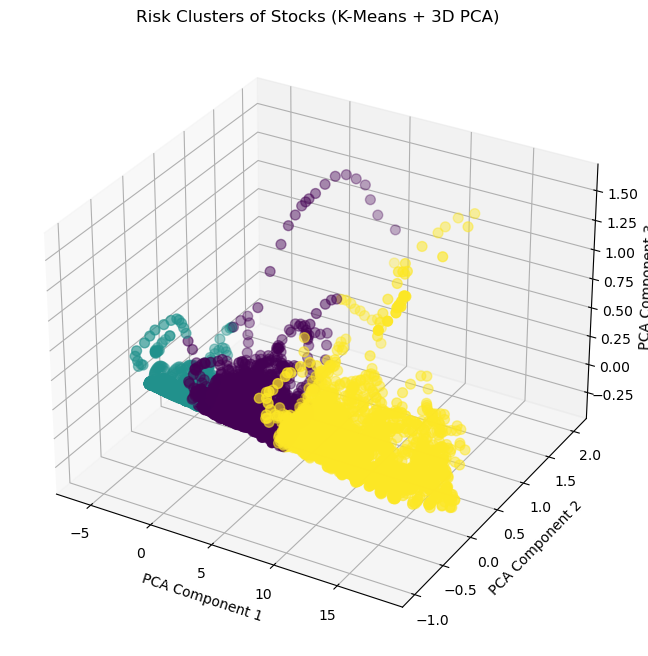

In [67]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], 
           c=data['Risk_Cluster'], cmap='viridis', s=50)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Risk Clusters of Stocks (K-Means + 3D PCA)')
plt.show()



In [62]:
# save results
data[['date', 'symbol', 'Risk_Label']].to_csv('stock_risk_clusters.csv', index=False)

### Silhouette Score Calculation

After applying K-Means clustering to group the stocks into risk categories, we can evaluate the quality of the clustering using the **Silhouette Score**. The Silhouette Score measures how well each data point has been clustered. A higher Silhouette Score indicates that the data points are well matched to their own cluster and poorly matched to neighboring clusters.

#### 1. Calculate the Silhouette Score
The `silhouette_score` function from `sklearn.metrics` calculates the Silhouette Score, which is based on two factors:
- **Cohesion**: How similar a data point is to other points within the same cluster.
- **Separation**: How different a data point is from points in other clusters.




In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df, data['Risk_Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.595


In [408]:
data['Risk_Label'].value_counts()

Risk_Label
Medium Risk    9118
High Risk      7829
Low Risk       2733
Name: count, dtype: int64

In [117]:
df = pd.read_csv('stock_risk_clusters.csv')

In [118]:
df.tail(20)

,date,symbol,Risk_Label
20290,2024-10-07 00:00:00+00:00,XOM,Low Risk
20291,2024-10-08 00:00:00+00:00,XOM,Low Risk
20292,2024-10-09 00:00:00+00:00,XOM,Low Risk
20293,2024-10-10 00:00:00+00:00,XOM,Low Risk
20294,2024-10-11 00:00:00+00:00,XOM,Low Risk
20295,2024-10-14 00:00:00+00:00,XOM,Low Risk
20296,2024-10-15 00:00:00+00:00,XOM,Low Risk
20297,2024-10-16 00:00:00+00:00,XOM,Low Risk
20298,2024-10-17 00:00:00+00:00,XOM,Low Risk
20299,2024-10-18 00:00:00+00:00,XOM,Low Risk
